In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.autograd import Variable

z_dim=8
hidden_size=100
batch_size=48
lr=1e-3
epochs=120
d_update_freq=3

In [2]:
model_G = nn.Sequential(nn.Linear(z_dim, hidden_size),
                        nn.ReLU(inplace=True),
                        nn.Linear(hidden_size, 2))
model_D = nn.Sequential(nn.Linear(2, hidden_size),
                        nn.ReLU(inplace=True),
                        nn.Linear(hidden_size, 1),
                        nn.Sigmoid())

optimizer_G = torch.optim.Adam(model_G.parameters(), lr=lr)
optimizer_D = torch.optim.Adam(model_D.parameters(), lr=lr)
real_samples = torch.stack([torch.normal(torch.ones(2), torch.Tensor([2, 1])) for _ in range(batch_size * 8)])

In [3]:
def plot(epoch, real_batch, fake_batch):
    plt.subplot(4,4, epoch // 10 + 1)
    real_batch = real_batch.data.numpy().T
    fake_batch = fake_batch.data.numpy().T
    plt.scatter(real_batch[0], real_batch[1])
    plt.scatter(fake_batch[0], fake_batch[1])
    plt.xlim(-5, 7)
    plt.ylim(-3, 5)
    plt.title(f"{epoch + 1}th epoch")

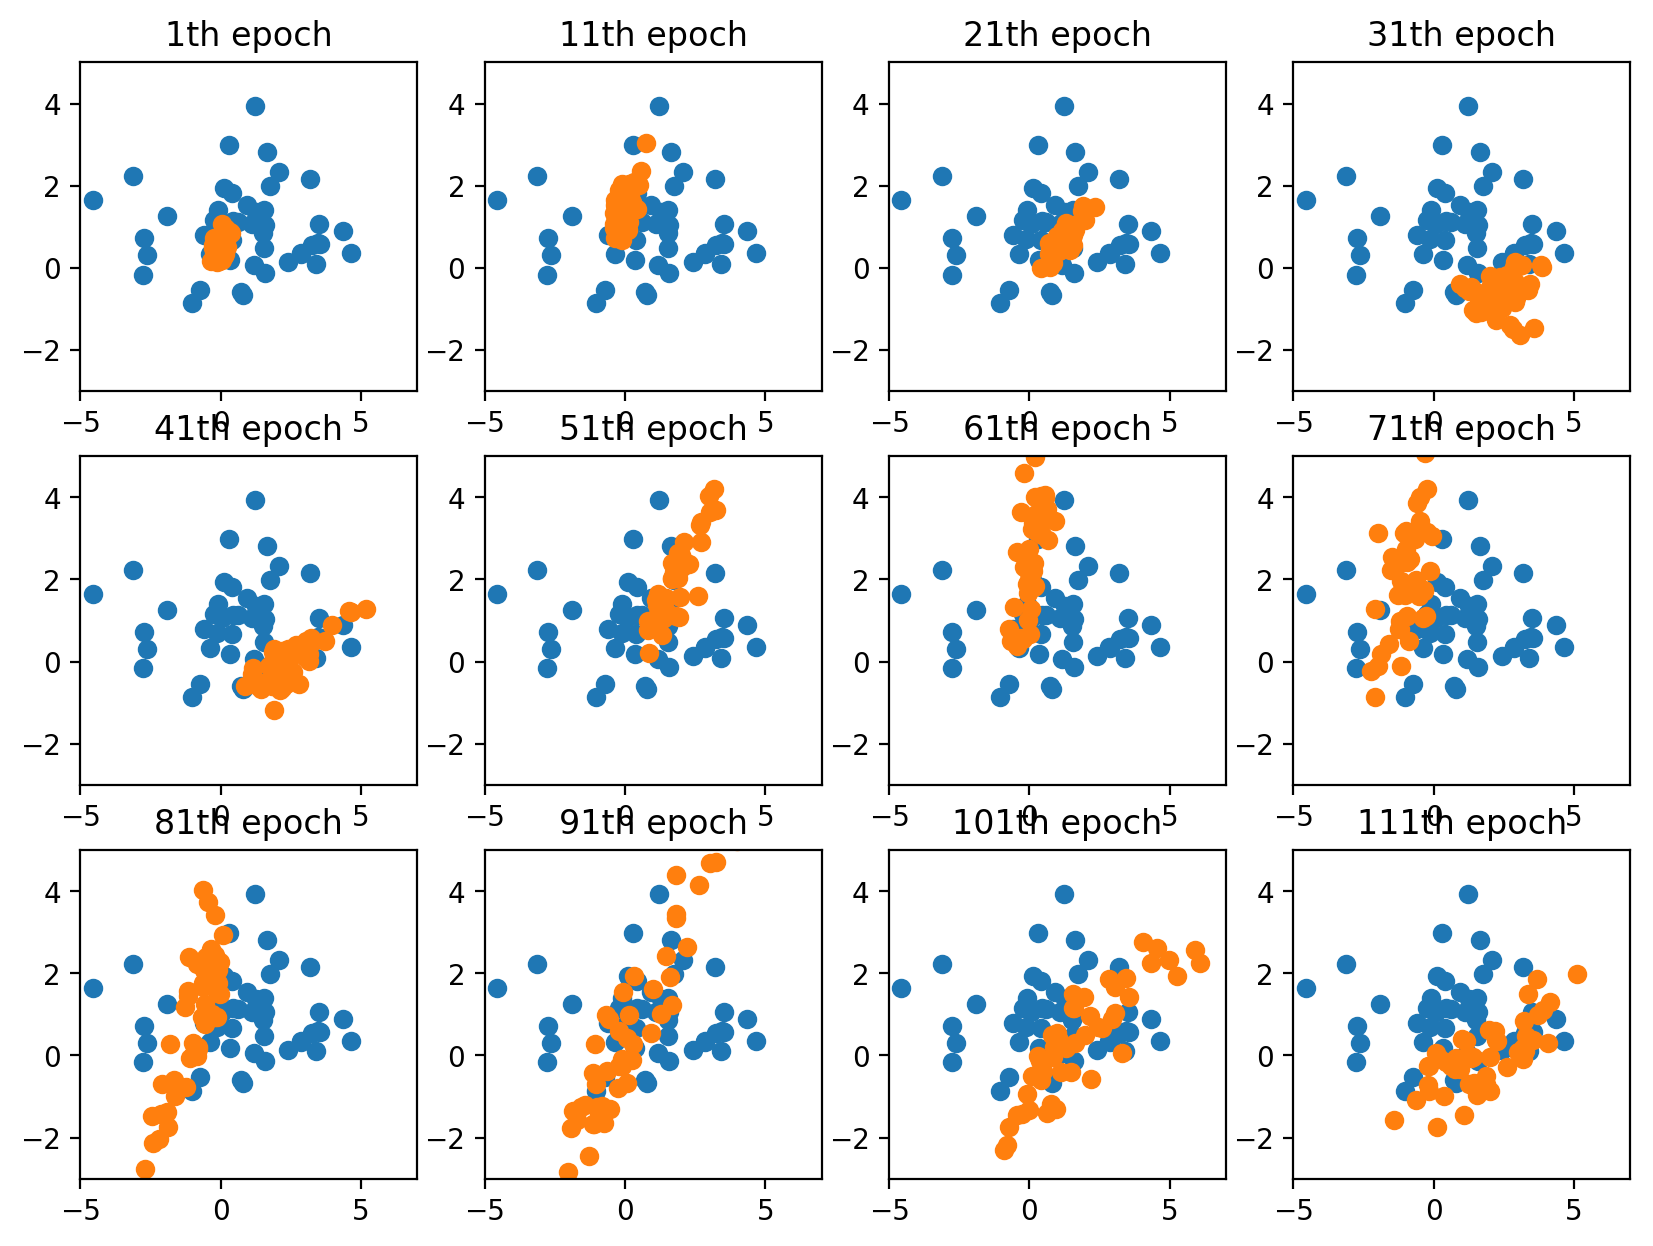

In [4]:
def use_saturate_loss():
    plt.figure(figsize=(10,10),dpi=200)
    for ep in range(epochs):
        for t, real_batch in enumerate(real_samples.split(batch_size)):
            z = Variable(torch.zeros(real_batch.size(0), z_dim).normal_())

            real_batch = Variable(real_batch)
            fake_batch = model_G(z)

            fake_score = model_D(fake_batch)
            real_score = model_D(real_batch)

            if t % d_update_freq == 0:
                loss = (1 - fake_score).log().mean()
                optimizer_G.zero_grad()
                loss.backward()
                optimizer_G.step()

            else:
                loss = - (real_score.log().mean() + (1 - fake_score).log().mean())
                optimizer_D.zero_grad()
                loss.backward()
                optimizer_D.step()
                
        if ep % 10 == 0:
            plot(ep, real_batch, fake_batch)
            
use_saturate_loss()

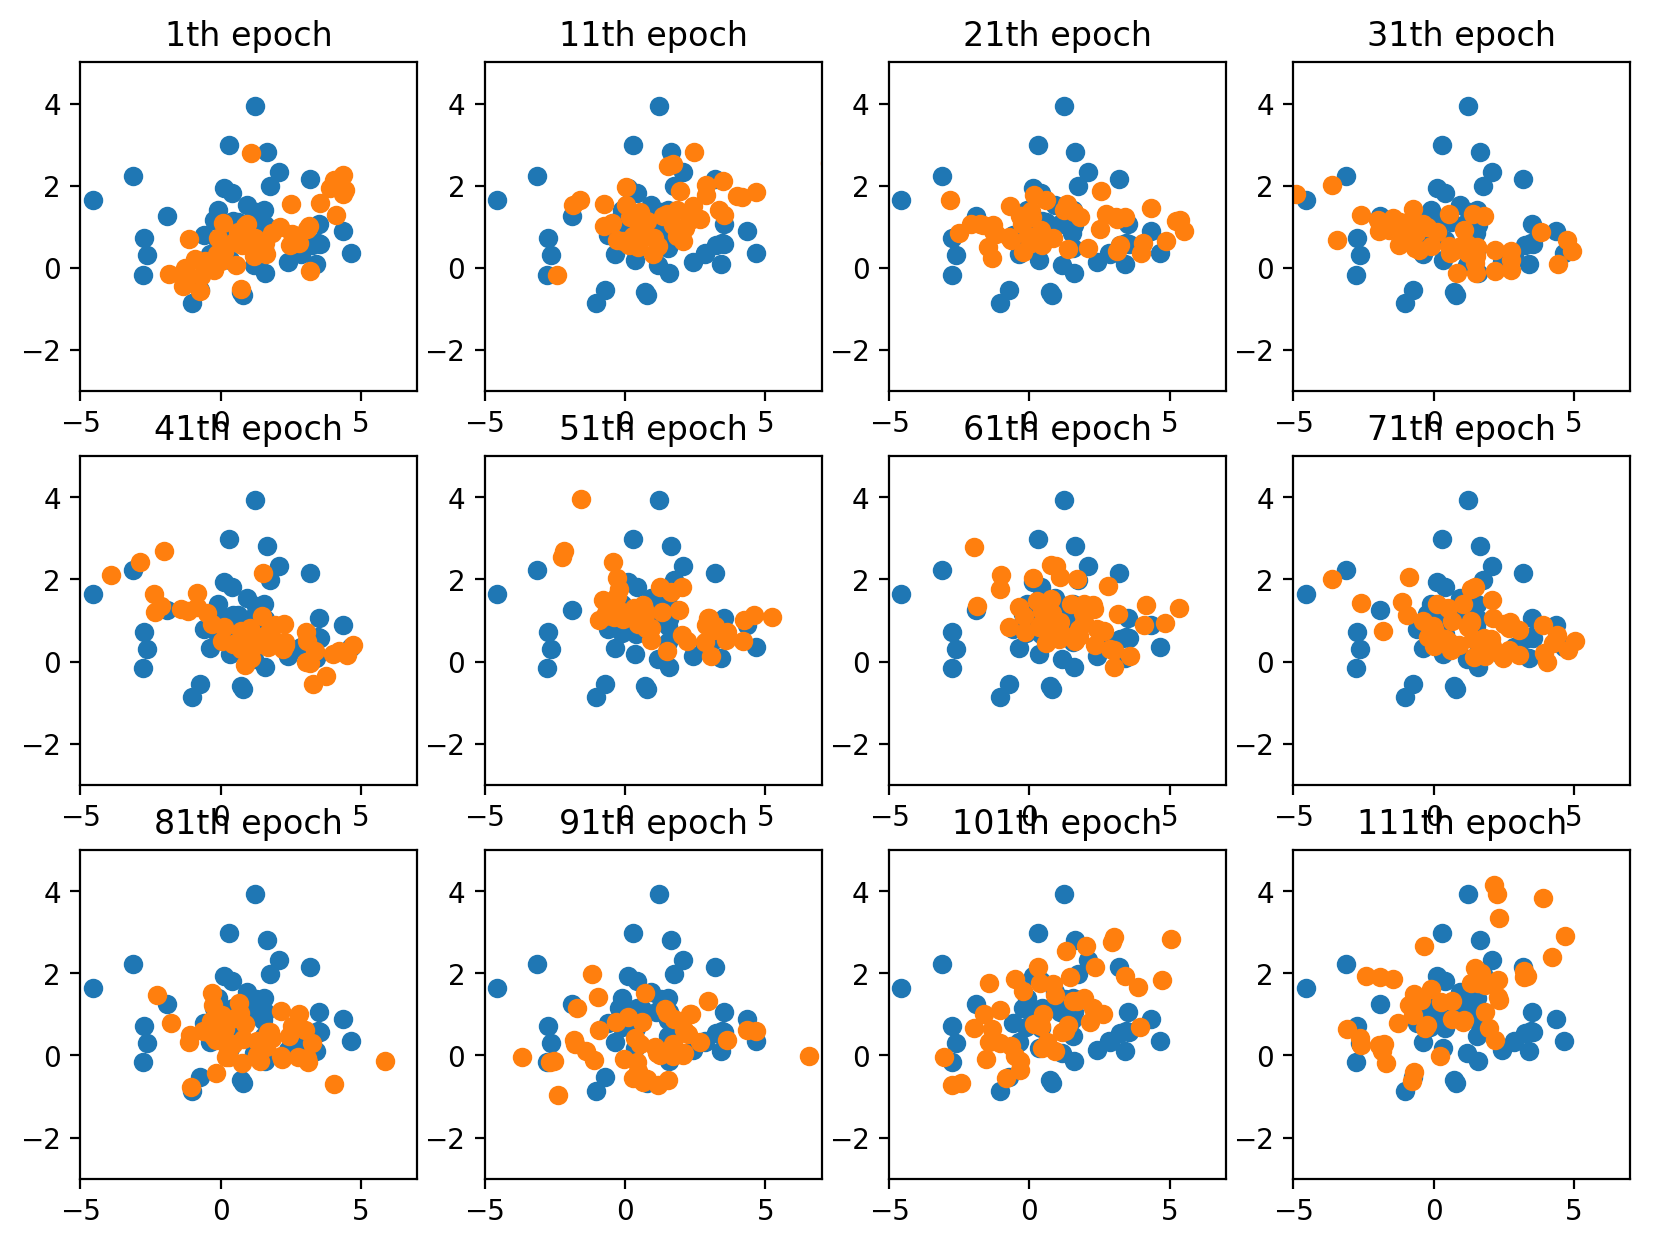

In [5]:
def use_nonsaturate_loss():
    plt.figure(figsize=(10,10),dpi=200)
    for ep in range(epochs):
        for t, real_batch in enumerate(real_samples.split(batch_size)):
            z = Variable(torch.zeros(real_batch.size(0), z_dim).normal_())

            real_batch = Variable(real_batch)
            fake_batch = model_G(z)

            fake_score = model_D(fake_batch)
            real_score = model_D(real_batch)

            if t % d_update_freq == 0:
                loss = - fake_score.log().mean()
                optimizer_G.zero_grad()
                loss.backward()
                optimizer_G.step()

            else:
                loss = - (real_score.log().mean() + (1 - fake_score).log().mean())
                optimizer_D.zero_grad()
                loss.backward()
                optimizer_D.step()
                
        if ep % 10 == 0:
            plot(ep, real_batch, fake_batch)
            
use_nonsaturate_loss()